# <p style="text-align: center;"> Final Project - Introduction to Data Science</p>
# <p style="text-align: center;"> <b> Data Modeling </b></p>
---

## Member Information
| Name              | ID       |
|-------------------|----------|
|Tran Dinh Quang    | 21127406 |
|Nguyen Hong Hanh   | 21127503 |
|Do Quoc Tri  | 21127556 |
| Nguyen Khanh Nhan | 21127657         |


## Table of contents
- [0. Import libraries](#0-import-libraries)
- [1. Problem statement](#1-problem-statement)
    - [1.1 State the problem](#11-state-the-problem)
    - [1.2 Purpose of solving the problem](#12-purpose-of-solving-the-problem)
- [2. Data preparation](#2-data-preparation)
    - [2.1 Pre-processing](#21-pre-processing)
    - [2.2 Splitting data](#22-splitting-data)
- [3. Data modeling](#3-data-modeling)
    - [3.1 Model selection](#31-model-selection)
    - [3.2 Fine-tuning model](#32-fine-tuning-model)
    - [3.3 Basic ensemble method](#33-basic-ensemble-method)
    - [3.4 Model training](#34-model-training)
    - [3.5 Model evaluation](#35-model-evaluation)
- [4. References](#4-references)
---

## 0. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Problem Statement

### 1.1 State the problem



- `Ho Chi Minh City` is one of the largest cities in `Vietnam`, with a **high population density** and numerous industrial and urban areas. The weather in this city is **not overly complex**, mainly consisting of two seasons:   `sunny and rainy`. However, due to its dense and developed nature, weather forecasting and classification are necessary for the residents to better prepare for their activities.
- With the dataset on the weather conditions in `Ho Chi Minh City` from September 2009 to May 2023, we will use a machine learning model to perform weather classification based on the information about the surrounding environment.
- The machine learning model will be able to classify weather types `(rain, sunny, etc.)` based on the provided information about the surrounding environment in a specific area.

### 1.2 Purpose of solving the problem


- With the machine learning model, you can classify weather conditions such as `sunny, rainy, strong winds, and more`. This can be useful in providing weather forecast information to users or organizations.
- It will leverage the surrounding environmental factors to `classify` and `predict weather`, providing useful information for forecasting applications, analysis, risk assessment, and optimizing operations in the field of weather and environment.
- `Weather classification` will help individuals better prepare for their activities, especially outdoor activities, transportation, and more.
- **In summary**, the purpose of the machine learning model in this case is to utilize the surrounding environmental conditions to classify and predict weather, providing useful information for forecasting applications, analysis, risk assessment, and optimizing operations in the field of weather and environment.

### 1.3 How to solve the problem

- We will use machine learning classification models to classify weather based on the information about the surrounding environment.
- In our dataset, the last column, `icon`, will be the `target column`, while the remaining columns will be the `input columns`.
- We will train multiple different models on the `training set` and then select the best and most representative models by using `k-fold cross-validation` on the `validation set`.
- Perform `fine-tuning` to find the `best hyperparameters` for the models.
- Utilize `ensemble` methods to improve the `accuracy` of the model.
- Finally, we will evaluate the model on the `test set` to assess the accuracy of the model.

## 2. Data preparation

### 2.1 Pre-processing

- First, we load our `processed data`.

In [2]:
df = pd.read_csv('../data/processed_data.csv')
df.head()

,temp,humidity,windspeed,pressure,cloudcover,precip,precipcover,preciptype,winddir,visibility,uvindex,sunrise,sunset,moonphase,month,icon
0,-1.557745,1.718328,2.186945,-1.836712,2.265555,3.332084,-0.653935,-1.334748,1.077456,-0.337296,-0.913358,-0.562840,-0.534073,-0.736171,0.633058,partly-cloudy-day
1,-0.595430,1.054397,0.333289,-1.573319,1.026222,1.101707,-0.653935,-1.334748,0.718558,0.448494,-0.744503,-0.573163,-0.679502,-0.287499,0.915128,partly-cloudy-day
2,0.222537,0.688090,0.333289,-0.519747,0.004317,2.669459,-0.653935,-1.334748,0.927915,0.448494,-1.251067,-0.575457,-0.715136,-0.183959,0.915128,partly-cloudy-day
3,-0.787893,1.729775,0.333289,-0.309032,1.424838,0.395285,-0.653935,-1.334748,0.799559,0.291336,-0.406793,-0.576604,-0.749808,-0.045906,0.915128,partly-cloudy-day
4,-1.124703,1.386362,-0.509282,0.007040,1.272639,0.629678,-0.653935,-1.334748,-0.137563,-0.415875,-0.913358,-0.577751,-0.785443,0.057634,0.915128,partly-cloudy-day


- Here, we observe the `icon` column (the target column) to determine the number of different data classes.

In [3]:
df['icon'].value_counts().to_frame()

,count
icon,
rain,2569
partly-cloudy-day,1441
clear-day,1


- There are `3`different data classes: `partly-cloudy-day`, `rain`, and `clear-day`. However, there is **only one row** in the data labeled as `clear-day`. Therefore, we will remove this row as it is unlikely to be helpful for our machine learning model.

In [4]:
id = df[df['icon'] == 'clear-day'].index[0] # find the index 
df.drop(id, inplace=True)
# check again
df['icon'].value_counts().to_frame()

,count
icon,
rain,2569
partly-cloudy-day,1441


- To use in a machine learning model, we need to convert the `labels` into `numerical form`. We will use a `LabelEncoder` to transform the labels into numerical values.

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['icon'])

In [6]:
df['label_encoded'].value_counts().to_frame()

,count
label_encoded,
1,2569
0,1441


- After encoding, we can see that `rain` is encoded as `1` and `partly-cloudy-day` is encoded as `0`.
- Split dataframe into 2 parts are `X` and `y` with `X` contains the input values and `y` contains the corresponding labels.

In [7]:
X = df.drop(['icon', 'label_encoded'], axis=1).values
y = df['label_encoded'].values

In [8]:
X.shape, y.shape

((4010, 15), (4010,))

### 2.2 Splitting data

In [9]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [10]:
X_train.shape, X_val.shape, X_test.shape

((2406, 15), (802, 15), (802, 15))

## 3. Data Modeling

### 3.1 Train model

The classification models that will be used:
- `Logistic Regression`.
- `K-Nearest Neighbors Classifier`.
- `Decision Tree`.
- `Random Forest Classifier`.
- `Support Vector Machine`.
- `Naive Bayes`.
- `XGBoost Classifier`.
---


Except for the `XGBoost Classifier` and `Random Forest Classifier`, the remaining models are already well-known for classification problems. <br>


- `The Random forest classifier` creates a set of `decision trees` from a randomly selected subset of the `training set`. It is basically a set of `decision trees (DT)` from a randomly selected subset of the training set and then It collects the votes from different `decision trees` to decide the `final prediction`.
- `XGBoost (extreme Gradient Boosting)` is a machine learning algorithm used for `classification` and `regression` tasks. It is a powerful and efficient `gradient boosting tree algorithm`. `XGBoost` utilizes a collection of `decision trees` to build a model. However, the strength of `XGBoost` lies in its ability to optimize and improve these decision trees for better performance. Specifically, `XGBoost` employs a `gradient tree boosting optimization method`, combined with `regularization` techniques, to reduce overfitting and enhance the accuracy of the model.

---
First, we will create the models and train them on the `training set`. We will then evaluate them preliminarily using the `accuracy` metric on the `validation set`.
- `accuracy`: this is the most basic metric for evaluating a classification model. It is the ratio of the total number of correct predictions and the total number of predictions.
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = [
    LogisticRegression(solver='liblinear', random_state=42, max_iter=1000),
    KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2), # p=2 is equivalent to using the euclidean distance
    DecisionTreeClassifier(criterion='entropy', random_state=42),
    RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42),
    SVC(kernel='rbf', random_state=42),
    GaussianNB(),
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
]

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score


model_names = []
model_accuracy = []
for model in models:
    model_names.append(type(model).__name__)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    model_accuracy.append(accuracy_score(y_val, y_pred))  
    

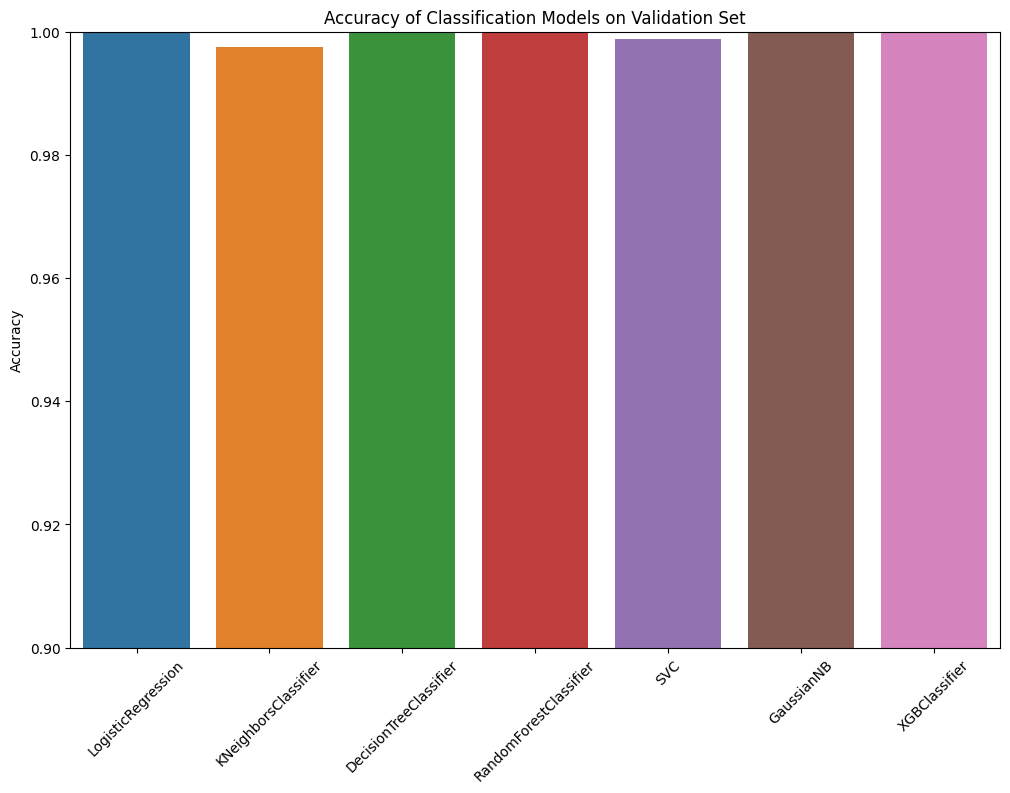

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(x=model_names, hue=model_names, y=model_accuracy) 
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.title('Accuracy of Classification Models on Validation Set')
plt.show()

**Comment:**
- We can see that all of the models have **high accuracy** on the `validation set`. This is partly due to our dataset being weather data in `Ho Chi Minh City`, where the weather is relatively **simple with fewer variations**. However, for long-term purposes and the desire to apply this model to multiple datasets from different locations or places with diverse climates, we will proceed with the next step, which is `model selection`, to choose the best models among the available ones.

### 3.2 Model selection

- We will use the `k-fold cross-validation` method to select the best and most representative model to use.
- we will use the `recall` metric and `k-fold cross-validation` method on the `validation set` to select good models:
- `recall`: is the measure of our model correctly identifying `True Positives`. Thus, for all the days that actually rain, how many of those did we correctly predict as rain? This is the metric we want to **maximize**. Because we genuinely want to **accurately predict rainy days**, we can tolerate predicting a `non-rainy day` as `rainy`, but we cannot accept our model predicting `a rainy day` as `non-rainy`. Therefore, we will use this metric as a primary criterion to evaluate the models.
$$
recall = \frac{TP}{TP + FN}
$$

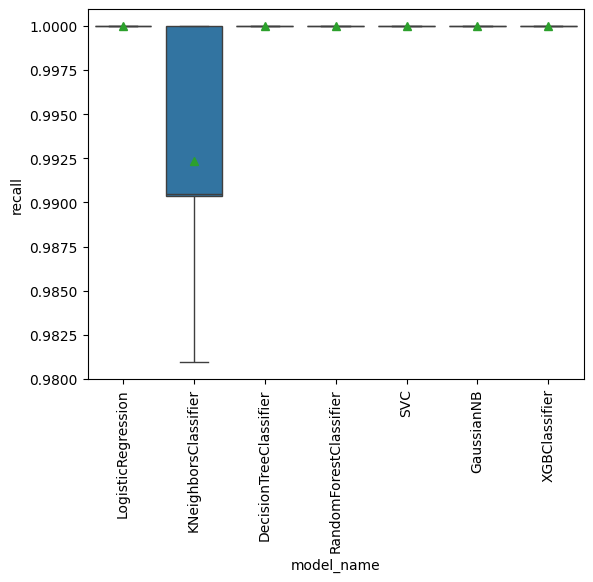

,Mean recall,Standard deviation
model_name,,
DecisionTreeClassifier,1.000000,0.000000
GaussianNB,1.000000,0.000000
LogisticRegression,1.000000,0.000000
RandomForestClassifier,1.000000,0.000000
SVC,1.000000,0.000000
XGBClassifier,1.000000,0.000000
KNeighborsClassifier,0.992363,0.007974


In [14]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def generate_baseline(models, X, y, cv=5, plot_result = False):
    k_fold = StratifiedKFold(cv, shuffle=True, random_state=42)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, cv=k_fold, scoring='recall')
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
            
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'recall'])
    
    if plot_result:
        sns.boxplot(x='model_name', y='recall', data=cv_df, showmeans=True)
        plt.xticks(rotation=90)
        plt.show()
        
    # Sumary result
    mean = cv_df.groupby('model_name')['recall'].mean()
    std = cv_df.groupby('model_name')['recall'].std()
    
    result_df = pd.concat([mean, std], axis=1, ignore_index=True)
    result_df.columns = ['Mean recall', 'Standard deviation']
    result_df.sort_values(by='Mean recall', ascending=False, inplace=True)
    
    return result_df
        
generate_baseline(models, X_val, y_val, plot_result=True)

**Comment:**
- By observing the `box plot chart` and the `statistical table` below after performing the `k-fold cross-validation` method, we can see that except for the `K-Nearest Neighbors Classifier`, all the other models have **perfect recall**. This indicates that these models have the ability to accurately predict rainy days.
- However, we will proceed with the next step, which is `fine-tuning`, to find the `best hyperparameters` for our models.

### 3.2 Fine-tuning model

We will select 3 models for `fine-tuning` to find their `best hyperparameters`:
- `K-Nearest Neighbors Classifier`: Upon observation, we can see that this model has the **lowest recall** among the tested models. Therefore, finding the `best hyperparameters` for this model can potentially improve its accuracy.
- For the remaining two models, we will select the `Random Forest Classifier` and `XGBoost Classifier` for `fine-tuning`. Both of these models have shown excellent results, and since they are both `ensemble models`, fine-tuning can further improve their accuracy.

We will use `GridSearchCV` to perform fine-tuning on the `validation set` for the models and find the `best hyperparameters`. <br>
`GridSearchCV` is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a `cross-validation` technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made. <br>
The metric we will use to evaluate the models is `recall` because this is a binary classification problem and we want the models to have the ability to accurately predict rainy days.

In [15]:
from sklearn.model_selection import GridSearchCV

---

Fine-tuning `K-Nearest Neighbors Classifier`:
- `n_neighbors`: The number of nearest neighbors used to predict the label of a new data point.
- `weights`: The method for calculating the weights of the nearest neighbors.
- `metric`: The distance metric used to measure the distance between data points.

In [16]:
knn_classifier = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [ 3, 5, 7], # number of neighbors
    'weights': ['uniform', 'distance'], # weight function used in prediction
    'metric': ['euclidean', 'manhattan'] # distance metric
}
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, scoring='recall', cv=5)

grid_search.fit(X_val, y_val)
print("Best Parameters for KNN classifier: ", grid_search.best_params_)

Best Parameters for KNN classifier:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


---

Fine-tuning `Random Forest Classifier`:
- `n_estimators`: The number of decision trees generated.
- `criterion`: The function used to measure the quality of a split.
- `max_depth`: The maximum depth of a decision tree.
- `min_samples_split`: The minimum number of samples a node must have before it can be split into child nodes.

In [17]:
rf_classifier = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300], # number of trees
    'criterion': ['entropy', 'gini'], # measure the quality of a split
    'max_depth': [5, 10, 15], # max depth of the tree
    'min_samples_split': [2, 5, 10], # min number of samples required to split an internal node
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='recall', cv=5)
grid_search.fit(X_val, y_val)
print("Best Parameters for Random Forest classifier: ", grid_search.best_params_)


Best Parameters for Random Forest classifier:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


---

Fine-tuning `XGBoost Classifier` 

In XGBoost as we mentioned above, there are two main types of hyperparameters: `tree-specific` and `learning task-specific`.
- `Tree-specific hyperparameters` control the construction and complexity of the decision trees:
    - `max_depth`: maximum depth of a tree.
    - `n_estimators`: number of trees to be created.
    - `min_child_weight`: minimum sum of instance weight (hessian) needed in a child.
- `Learning task-specific hyperparameters` control the overall behavior of the model and the learning process:
    - `learning_rate`: step size shrinkage used to prevent overfitting. It ranges from 0 to 1.

In [18]:
xgb_classifier = XGBClassifier()
param_grid = {
    'n_estimators': [100, 200, 300], # number of trees
    'max_depth': [5, 10, 15], # max depth of the tree
    'min_child_weight': [1, 5, 10], # min number of samples required to split an internal node
    'learning_rate': [0.1, 0.01, 0.001], # learning rate
}

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='recall', cv=5)
grid_search.fit(X_val, y_val)
print("Best Parameters for XGBoost classifier: ", grid_search.best_params_)

Best Parameters for XGBoost classifier:  {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}


---

- After finding the `best hyperparameters` for the models, we will re-evaluate their accuracy on the `validation set` to see if there is any improvement.
- We have already used familiar metrics such as `accuracy` and `recall`. However, there is another metric we can consider, which is the `ROC curve and AUC`.
- The `ROC curve` is a graph that shows the relationship between the `True Positive Rate` and `False Positive Rate` of a classifier at different classification `thresholds`.
- The `AUC` is the area under the `ROC curve`. The AUC value provides information about the classifier's ability to classify correctly across all decision threshold ranges. A model with a **higher AUC** has **better classification capabilities** compared to a model with `a lower AUC`.

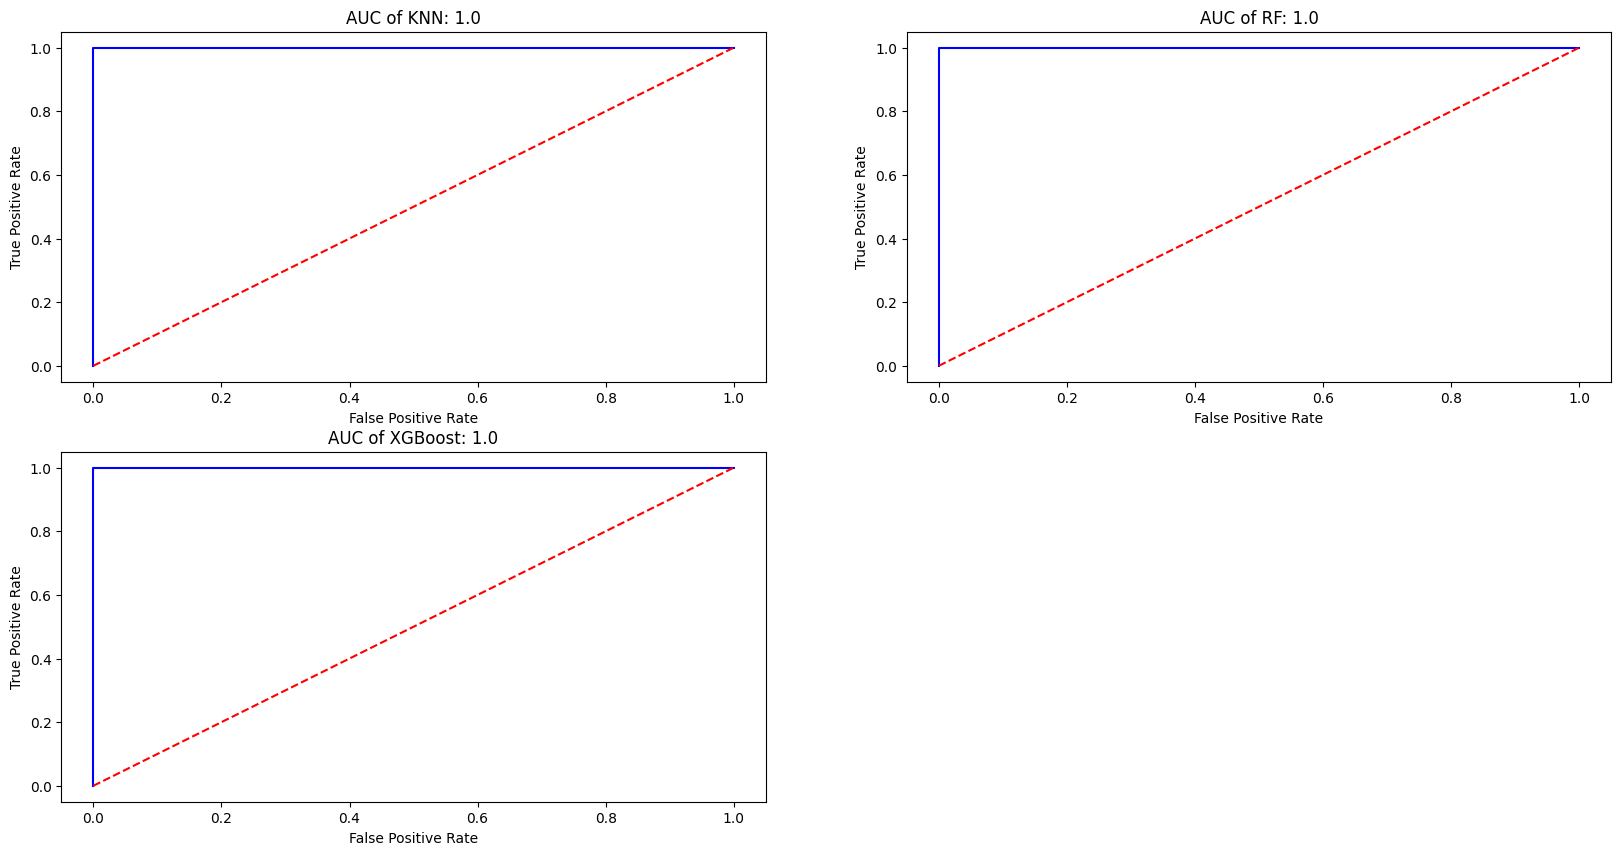

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score


model1 = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='uniform')
model2 = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5, min_samples_split=2)
model3 = XGBClassifier(n_estimators=100, max_depth=5, min_child_weight=1, learning_rate=0.1)
# train the models
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
# find Positive class probabilities
pred_prob1 = model1.predict_proba(X_test)[:, 1]
pred_prob2 = model2.predict_proba(X_test)[:, 1]
pred_prob3 = model3.predict_proba(X_test)[:, 1]

# plot ROC curves
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
# calculate ROC curve and auc for 3 models
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_prob1)
roc_auc_1 = roc_auc_score(y_test, pred_prob1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_prob2)
roc_auc_2 = roc_auc_score(y_test, pred_prob2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, pred_prob3)
roc_auc_3 = roc_auc_score(y_test, pred_prob3)

# KNN
axes[0, 0].plot(fpr1, tpr1, color='blue', label='KNN ROC curve (area = %0.3f)' % roc_auc_1)
axes[0, 0].plot([0, 1], [0, 1], linestyle='--', color='red')
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title(f'AUC of KNN: {roc_auc_1}')
# Random Forest
axes[0, 1].plot(fpr2, tpr2, color='blue', label='Random Forest ROC curve (area = %0.3f)' % roc_auc_2)
axes[0, 1].plot([0, 1], [0, 1], linestyle='--', color='red')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title(f'AUC of RF: {roc_auc_2}')
# XGBoost Classifier
axes[1, 0].plot(fpr3, tpr3, color='blue', label='XGBoost ROC curve (area = %0.3f)' % roc_auc_3)
axes[1, 0].plot([0, 1], [0, 1], linestyle='--', color='red')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].set_title(f'AUC of XGBoost: {roc_auc_3}')

axes[1, 1].axis('off')

plt.show()

**Comments**:
- Observing the `ROC curves`, we can see that the `ROC curves` of all three models are close to the `upper-left corner`, indicating **high TPR** and **low FPR** at various threshold values. This indicates that all the models have **good classification capabilities** for the data points. This is further supported by the `AUC values` of all three models, which are close to `1`.
- We can see that the models still maintain **perfect accuracy** on the `validation set` after performing `fine-tuning` of the hyperparameters. Additionally, the `K-Nearest Neighbors Classifier` shows **improved accuracy** on the `validation set` after `fine-tuning` compared to before `fine-tuning`.

### 3.3 Basic ensemble method

We will use the `Weighted Average` technique for the prediction results by combining the predictions of multiple models. <br>
Each model is associated with a `weight proportional` to its importance. The final result is the weighted average of all the model predictions. <br>
$$
pred_{final} = \sum_{i=1}^{n} (pred_i * w_i)
$$

Here, the weight of each model can be calculated by taking the `recall` of that model on the `validation set` and dividing it by the sum of the `recall` of all models on the `validation set`. However, we can also freely choose the weights for the models. <br>
Based on the results of the `k-folds cross-validation` method on the `validation set`, we define the weights as follows: <br>

| Model                          | Weight |
|--------------------------------|--------|
| K-Nearest Neighbors Classifier | 0.3    |
| Random Forest Classifier       | 0.35   |
| XGBoost Classifier             | 0.35   |

### 3.4 Model training

- After `fine-tuning` and find the best hyperparameters for each model and also using `Weighted Average` to ensemble models, we will train them on the `train + val` set.

In [20]:
model1 = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='uniform')
model2 = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5, min_samples_split=2)
model3 = XGBClassifier(n_estimators=100, max_depth=5, min_child_weight=1, learning_rate=0.1)

model1.fit(X_train_val, y_train_val)
model2.fit(X_train_val, y_train_val)
model3.fit(X_train_val, y_train_val)

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

weight_avg = 0.3*y_pred1 + 0.35*y_pred2 + 0.35*y_pred3
# because i want to reduce the number of false negative, i accept more false positive
# In weather forecasting, if rain is forecasted but it doesn't actually rain, it is generally acceptable.
# However, if no rain is forecasted but it actually rains, it significantly affects the users.
threshold = 0.4 
y_pred = np.where(weight_avg > threshold, 1, 0)

### 3.5 Model evaluation

In [21]:
print(f"Accuracy of the ensemble model: {accuracy_score(y_test, y_pred)}")
print(f"Confusion matrix of the ensemble model: \n{confusion_matrix(y_test, y_pred)}")
print(f"Recall of the ensemble model: {recall_score(y_test, y_pred)}")

Accuracy of the ensemble model: 1.0
Confusion matrix of the ensemble model: 
[[288   0]
 [  0 514]]
Recall of the ensemble model: 1.0


- Visualize `ROC curve` and `AUC` of `ensemble model`.

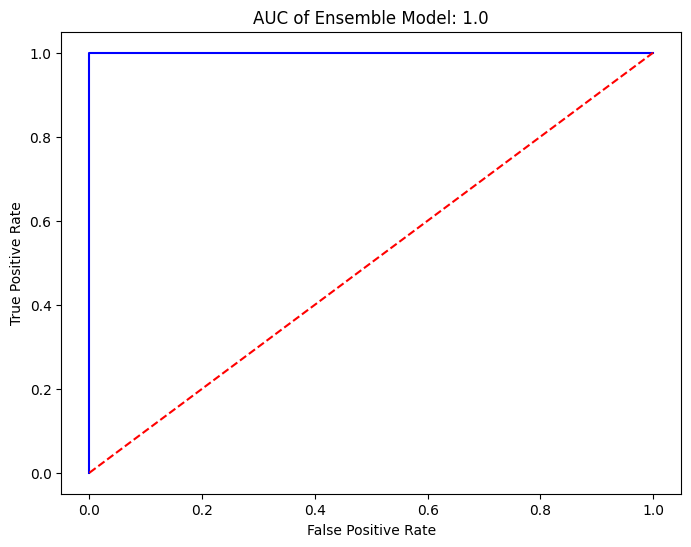

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'AUC of Ensemble Model: {roc_auc}')

plt.show()

**Comment:**
- Our final model has **perfect accuracy and recall** on the `test set`. The `ROC curve` and `AUC` also indicate that the model has the ability to classify data points accurately.
- As mentioned above, the reason for achieving such high accuracy is due to our dataset being weather data in `Ho Chi Minh City`, where the weather is relatively simple and does not have many fluctuations. If we were to replace it with weather data from a different location with more diverse climate patterns, we may not achieve the same high accuracy.
- However, we still go through all the steps, from applying `k-folds cross-validation` to select the best models, then performing `fine-tuning` to find the `best hyperparameters` for the models, and finally using `Weighted Average` to combine and improve the model's accuracy. With these steps, we can confidently say that even if the dataset changes, the final model will still be improved compared to using individual models without these steps.
- Lastly, with the **high accuracy** that the model achieves on the weather dataset in `Ho Chi Minh City`, we can use this final model for classification and weather prediction based on environmental information surrounding `Ho Chi Minh City`.

## 4. References
- `Introduction to Data Science` course slides and materials.
- [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
- [ROC curve and AUC](https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/)
- [Ensemble learning](https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/)
- [Grid Search CV](https://www.mygreatlearning.com/blog/gridsearchcv/#:~:text=GridSearchCV%20is%20a%20technique%20for,parameter%20values%2C%20predictions%20are%20made.)
- [XGBoost Classifier hyperparameter](https://medium.com/@rithpansanga/optimizing-xgboost-a-guide-to-hyperparameter-tuning-77b6e48e289d)

---
<p style="text-align:center; font-size:30px;">END</p>